# British Airways

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Task 1: Data Cleaning

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [34]:
data_path='/kaggle/input/customer-data/customer_booking.csv'
df = pd.read_csv(data_path, encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,xyz
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,852
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,852
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,852
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,852
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,852


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [36]:
cust_df=df.drop('xyz',axis=1)
cust_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [37]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [39]:
cust_df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [40]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

cust_df["flight_day"] = cust_df["flight_day"].map(mapping)

In [41]:
cust_df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [42]:
cust_df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [47]:
cust_df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


**Now we create two different dataframe from above dataset**
1. one for independent varibles  
2. and another for dependent variables

In [49]:
dep=pd.DataFrame(cust_df.iloc[:,[0,3,4,5,6,9,10,11,12]].values)
indep=cust_df.iloc[:,-1].values

In [62]:
dep
indep

array([0, 0, 0, ..., 0, 0, 0])

we rename this columns for better understanding and performing future analysis on it.

In [53]:
dep.rename(columns={
    0:'num_passengers',
    1:'purchase_lead',
    2:'length_of_stay',
    3:'flight_hour',
    4:'flight_day',
    5:'wants_extra_baggage',
    6:'wants_preferred_seat',
    7:'wants_in_flight_meals',
    8:'flight_duration'
},inplace=True)

In [54]:
dep

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2.0,262.0,19.0,7.0,6.0,1.0,0.0,0.0,5.52
1,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52
2,2.0,243.0,22.0,17.0,3.0,1.0,1.0,0.0,5.52
3,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52
4,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52
...,...,...,...,...,...,...,...,...,...
49995,2.0,27.0,6.0,9.0,6.0,1.0,0.0,1.0,5.62
49996,1.0,111.0,6.0,4.0,7.0,0.0,0.0,0.0,5.62
49997,1.0,24.0,6.0,22.0,6.0,0.0,0.0,1.0,5.62
49998,1.0,15.0,6.0,11.0,1.0,1.0,0.0,1.0,5.62


In [56]:
dep.shape,indep.shape

((50000, 9), (50000,))

## Task 2: Model Testing

In [63]:
#create training set using train test split from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dep,indep,test_size=0.25,random_state=0)

**Now we scale our dataset for better result such that we use StandardScalar from skikit learn**

In [64]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform your test data using the same scaler
X_test = scaler.transform(X_test)


After scaling, we applied RandomForestClassifier from sklearn to train dataset.

In [65]:
from sklearn.ensemble import RandomForrestClassifier
classfier=RandomForestClassifier(n_estimators=20,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

**Now its time to check and predict out score (0-1)**

In [66]:
classifier.score(X_train,y_train)

0.9919733333333334

It shows 0.99 which is nearly to 1 such that it is a good model to fit.

In [71]:
# Assuming you have already trained your RandomForestClassifier and stored it in 'classifier'
importances = classifier.feature_importances_

# 'importances' now contains the feature importances for each feature in the dataset

# You can print or analyze the importances for each feature
for feature, importance in enumerate(importances):
    print(f"Feature {feature}: {importance}")


Feature 0: 0.05320318150358323
Feature 1: 0.299571206362309
Feature 2: 0.16444437469926604
Feature 3: 0.1938216176517132
Feature 4: 0.11700341274180878
Feature 5: 0.015454000347792433
Feature 6: 0.01454014484187351
Feature 7: 0.02323846884583968
Feature 8: 0.11872359300581417


Now we can calculate and plot the feature importance of the dataframe, we can do the random forest agian with omiting the less important features that usually does improve prediction but as we got 0.99 we can ignore that part.

Text(0.5, 0, 'Feature Importanc')

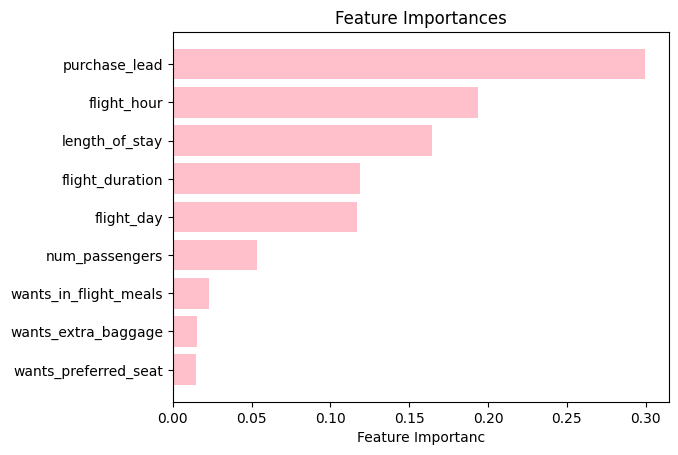

In [113]:
sort = classifier.feature_importances_.argsort()

plt.barh(dep.columns[sort], classifier.feature_importances_[sort],color='pink')


plt.title('Feature Importances')
plt.xlabel("Feature Importanc")

**Calculate Mean Absolute Error for the predictions made by your Random Forest classifier on the test data**

In [91]:
from sklearn.metrics import mean_absolute_error

y_pred=classifier.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2), 'degrees')

Mean Absolute Error: 0.16 degrees


**calculate the accuracy of your classifier's predictions on the test data.**

In [93]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84216


**calculation for error calculation and accuracy score**

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10395   213]
 [ 1760   132]]


now create confuion matrix and plot using matplotlib

Text(95.72222222222221, 0.5, 'Truth')

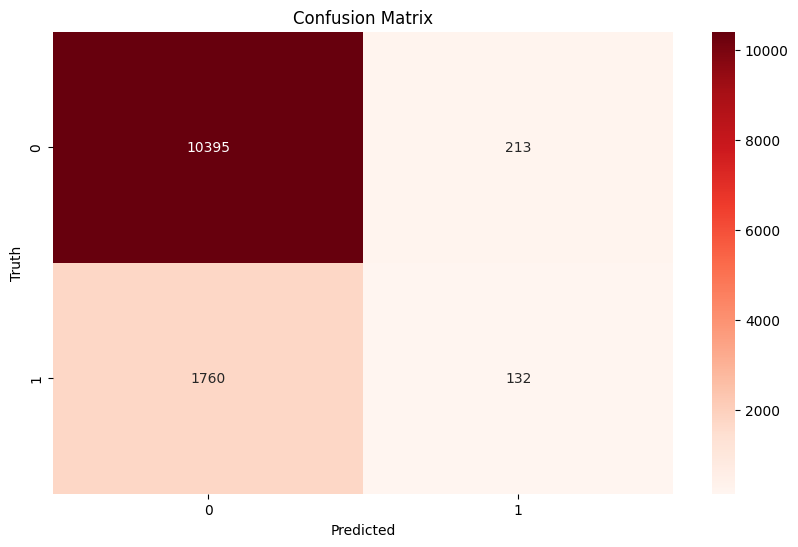

In [109]:
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix')

sns.heatmap(cm, annot=True, fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
